# California Housing Price

source : [data_california_house.csv](https://drive.google.com/file/d/1NJ7DsgZ3zIdZWTz17RQWgbtDBuk1JVg3/view)

# Content

1. Business Problem Understanding
1. Data Understanding
1. Data Preprocessing
1. Exploration Data Analysis
1. Modeling
1. Hyperparameter Tuning
1. Compare KNN Tuning Predict dengan Actual
1. Kesimpulan
1. Rekomendasi
1. Using Machine Learning

*****

# Business Problem Understanding

**Context**

Tempat tinggal merupakan kebutuhan pokok setiap manusia. Tetapi tidak semua orang memiliki pengetahuan tentang harga rumah yang sesuai dengan value yang di berikan. Di setiap negara cukup sulit untuk orang awam mengetahui harga rumah yang memiliki harga yang sesuai dengan value yang di berikan rumah atau perumahan tsb. Begitupun di negara california yang memiliki 50 lebih daerah yang tentunya tiap daerah memiliki harga rumah yang berbeda-beda. Fenomena ini menjadi kesempatan dan tantangan tersendiri untuk para developer perumahan untuk dapat membangun perumahan yang memiliki harga yang dapat bersaing di daerah tersebut dan tentunya memiliki value yang sesuai.

**Problem Statement**

Tantangan terbesar untuk para developer perumahan adalah membangun rumah dengan harga dan value rumah yang kompetitif dengan perumahan yang ada di sekitar daerah tersebut. **Sehingga rumah yang di tawarkan atau di bangun oleh developer dapat memberikan keuntungan financial yang maksimal dan rumah yang di bangun juga dapat terjual dengan cepat.**

**Goals**

Developer perumahan perlu memiliki 'tool' yang dapat memprediksi serta membantu mereka untuk dapat **menentukan harga dan value rumah yang akan mereka bangun** adanya perbedaan jumlah kamar, jumlah kamar mandi dan rata" atau median penghasilan masyarakat pada suatu perumahan akan membantu dalam memprediksi harga wajar suatu perumahan di suatu daerah. Yang mana akan mendatangkan profit untuk developer perumahan dan tentunya dengan harga yang kompetitif dan terjangkau orang masyarakat di daerah tersebut.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur - fitur yang ada, yang membedakan satu perumahan dengan perumahan lainnya.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu Developer Perumahan untuk dapat menyediakan 'tool' prediksi harga rumah yang akan mereka bangun, **yang mana akan berguna untuk developer memperkirakan budget untuk membangun perumahan secara maksimal agar dapat menghasilkan keuntungan finansial yang maksimal dan tentunya dengan value yang dapat bersaing di daerah tersebut.**

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, MAPE dan R-Squared, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. sedangan R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

# Data Understanding

> ## Dataset 1 (```data_california_house.csv```)
- dataset merupakan hasil surve sensus perumahan di california pada tahun 1990
- setiap data dalam dataset menginformasikan terkait perumahan dan populasi perumahan

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | float64 | Koordinat garis bujur |
| latitude | float64 | Koordinat garis lintang |
| housing_median_age | float64 | Median Umur Rumah |
| total_rooms | float64 | Total Ruangan |
| total_bedrooms | float64 | Total Kamar Tidur |
| population | float64 | Populassi Perumahan |
| households | float64 | Total Rumah Tangga |
| median_income | float64 | Median pendapatan dengan satuan sepuluh ribu US Dollar |
| ocean_proximity | object  | Jarak Perumahan dari Laut |
| median_house_value | float64 | Median Harga Rumah dengan satuan US dollar |

longitude	latitude	housing_median_age	total_rooms	total_bedrooms	population	households	median_income	ocean_proximity	median_house_value

> ## Dataset 2 (```Data_JALAN_KOTA_DAERAH.csv```)
- dataset ini merupakan interpretasi lokasi perumahan yang di dapat dari mengolah feature ```Latitude```, ```Longitude``` menggunakan library geopy.geocoders yang menghasilkan feature ```road```,	```county```,	```city```,	dan ```state``` 

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| road | object | Lokasi Jalan Perumahan |
| county | object | Lokasi Daerah Perumahan |
| city | object | Lokasi Kota Perumahan |
| state | object | Negara Perumahan |

# Data Preprocessing

> ## Library and Load Dataset

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

ada 2 data set yang akan di gabung kan yaitu :
1. Dataset ```data_california_house.csv```
2. Dataset ```Data_JALAN_KOTA_DAERAH.csv``` yang berisi feature ```road```, ```county```, ```city```, dan ```state``` yang di olah dari feature ```longtitude``` dan ```latitude``` dari dataset ```data_california_house.csv```. 

Alasan saya membuat feature baru dengan dataset baru karena proses pengolahan convert dari feature ```longtitude``` dan ```latitude``` menjadi feature ```road```, ```county```, ```city```, dan ```state``` memakan waktu yang relatif lama sehingga akan lebih efektif bisa prosesnya saya lakukan di file yang berbeda. file ```ipymb``` juga akan saya lampirkan

In [2]:
# Load dataset
df = pd.concat([pd.read_csv('data_california_house.csv'), pd.read_csv('Data_JALAN_KOTA_DAERAH.csv')], axis = 1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,Unnamed: 0,road,county,city,state
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,0,H Street,Fresno County,Fresno,California
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,1,International Boulevard Busway,Alameda County,Oakland,California
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,2,Gerritt Avenue,Los Angeles County,NaN,California
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3,South Carondelet Street,Los Angeles County,Los Angeles,California
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4,South Modoc Street,Fresno County,Fresno,California


Menggabungkan dataset ```data_california_house.csv``` dan ```Data_JALAN_KOTA_DAERAH.csv```

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
 10  Unnamed: 0          14448 non-null  int64  
 11  road                13716 non-null  object 
 12  county              14061 non-null  object 
 13  city                8590 non-null   object 
 14  state               14448 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 1.7+

> ## Drop Feature Unamed : 0 dan state

feature ```Unamed : 0``` akan di drop karena feature ini terbentuk karena nomer index dari dataset ```Data_JALAN_KOTA_DAERAH.csv```, sehingga feature tidak memberikan informasi apapun

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df['state'].value_counts()

California         14445
Baja California        1
Oregon                 1
Nevada                 1
Name: state, dtype: int64

feature ```State``` akan di drop karena feature ini berisi lokasi negara dari longtitude dan latitude, karena dataset ```data_california_house.csv``` di hasilkan dari hasil sensus 1990 di negara california. jadi saya asumsikan 3 lokasi yang selain california adalah di perbatasan california dan masih masuk daerah california. jadi feature ini hanya berisi 1 informasi yaitu lokasi bertempat di negara california saja

In [6]:
df.drop('state', axis = 1, inplace = True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
 10  road                13716 non-null  object 
 11  county              14061 non-null  object 
 12  city                8590 non-null   object 
dtypes: float64(9), object(4)
memory usage: 1.4+ MB
None


Dilihat dari Dtypenya tidak ada feature yang memiliki kesalahan Dtype

Dilihat dari jumlah non-null Beberapa Feature sekilas memiliki data null atau missing value

> ## Cleaning Data
Check Missing Value

In [8]:
print('Jumlah Missing Value \nJumlah Data = 14448')
print(df.isna().sum())
print('\n----Persen Missing Value----')
print(df.isna().sum()/len(df)*100)

Jumlah Missing Value 
Jumlah Data = 14448
longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms         137
population               0
households               0
median_income            0
ocean_proximity          0
median_house_value       0
road                   732
county                 387
city                  5858
dtype: int64

----Persen Missing Value----
longitude              0.000000
latitude               0.000000
housing_median_age     0.000000
total_rooms            0.000000
total_bedrooms         0.948228
population             0.000000
households             0.000000
median_income          0.000000
ocean_proximity        0.000000
median_house_value     0.000000
road                   5.066445
county                 2.678571
city                  40.545404
dtype: float64


beberapa feature yang memiliki missing value dan jumlah missing valuenya sebagai berikut : 
1. total_bedrooms ----- 137
2. road --------------- 732
3. county ------------- 387
4. city --------------- 5858

> ## Handling Missing Value
```total_bedrooms```

In [9]:
df[df['total_bedrooms'].isna() == True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,road,county,city
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0,Cleveland Avenue,Sacramento County,Sacramento
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0,Gunther Road,San Bernardino County,NaN
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0,East Yale Street,San Bernardino County,Ontario
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0,Racquet Club Circle,Sonoma County,NaN
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0,Pine Street,Shasta County,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0,North Nantes Avenue,Los Angeles County,NaN
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0,South Cinda Street,Orange County,Anaheim
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0,Hermitage Avenue,Los Angeles County,Los Angeles
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0,Haynes Street,Los Angeles County,Los Angeles


In [10]:
df['total_bedrooms'].tail()

14443    229.0
14444    195.0
14445      NaN
14446    498.0
14447    328.0
Name: total_bedrooms, dtype: float64

## Check Oulier pada feature ```total_bedrooms```

Text(0.5, 1.0, 'Outlier Total_Bedrooms')

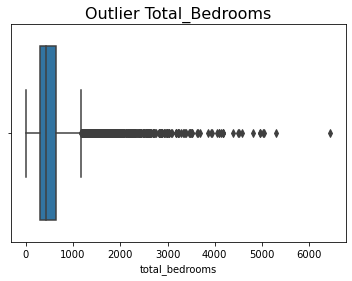

In [11]:
sns.boxplot(df['total_bedrooms'])
plt.title("Outlier Total_Bedrooms",size=16)

In [12]:
df['total_bedrooms'].describe()

count    14311.000000
mean       538.260709
std        423.577544
min          1.000000
25%        295.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [13]:
Q1_bedrooms = df['total_bedrooms'].quantile(0.25)
Q3_bedrooms = df['total_bedrooms'].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms
print(IQR_bedrooms)

352.0


In [14]:
oulier_bedrooms = df['total_bedrooms'][df['total_bedrooms'] < (Q1_bedrooms - 1.5 * IQR_bedrooms)] + df['total_bedrooms'][df['total_bedrooms'] > (1.5 * IQR_bedrooms + Q3_bedrooms)]
print(f'Batas bawah = {Q1_bedrooms - 1.5 * IQR_bedrooms}(sama dengan 0 karena tidak ada data di bawah 0)')
print(f'Batas atas = {1.5 * IQR_bedrooms + Q3_bedrooms}')
len(oulier_bedrooms)

Batas bawah = -233.0(sama dengan 0 karena tidak ada data di bawah 0)
Batas atas = 1175.0


879

Karena feature ```total_bedrooms``` memiliki cukup banyak outlier jadi untuk menggisi nilai nan menjadi **Median** dari ```total_bedrooms```

## Handling Missing Value ```total_bedrooms```

In [15]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
print(df.isnull().sum())
print('5 Baris akhir feature total_bedrooms setelah handle missing value')
print(df['total_bedrooms'].tail())

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households               0
median_income            0
ocean_proximity          0
median_house_value       0
road                   732
county                 387
city                  5858
dtype: int64
5 Baris akhir feature total_bedrooms setelah handle missing value
14443    229.0
14444    195.0
14445    435.0
14446    498.0
14447    328.0
Name: total_bedrooms, dtype: float64


> ## Handling Missing Value
```road```, ```county```, dan ```city```

Text(0.5, 1.0, 'Heatmap Missing Value \n road, county, dan city')

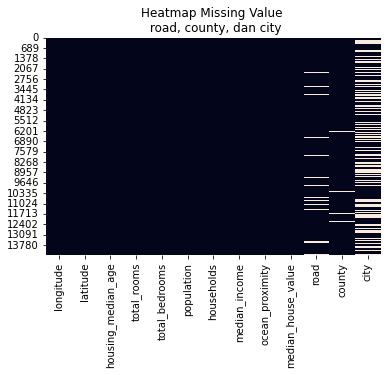

In [16]:
# Missing value heatmap
sns.heatmap(df.isnull(), cbar=False);
plt.title('Heatmap Missing Value \n road, county, dan city')

In [17]:
df[df['county'].isna() == True][['road', 'county','city']]

,road,county,city
48,Lapham Way,NaN,San Francisco
113,Valencia Street,NaN,San Francisco
133,Chestnut Street,NaN,San Francisco
171,Alemany Boulevard,NaN,San Francisco
201,Filbert Street,NaN,San Francisco
...,...,...,...
14302,Filbert Street,NaN,San Francisco
14316,Florida Street,NaN,San Francisco
14320,Mission Street,NaN,San Francisco
14353,Bradford Street,NaN,San Francisco


In [18]:
df[df['county'].isna() == True][['city']].value_counts()

city         
San Francisco    387
dtype: int64

In [19]:
df['county'].isna().sum()

387

In [20]:
df[(df['county'].isna()) & (df['city'] == 'San Francisco')]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,road,county,city
48,-122.43,37.71,52.0,1508.0,278.0,1138.0,304.0,4.0234,NEAR BAY,266500.0,Lapham Way,NaN,San Francisco
113,-122.42,37.75,52.0,2163.0,607.0,1447.0,546.0,3.3555,NEAR BAY,275000.0,Valencia Street,NaN,San Francisco
133,-122.44,37.80,52.0,3257.0,735.0,1045.0,620.0,4.5523,NEAR BAY,500001.0,Chestnut Street,NaN,San Francisco
171,-122.44,37.72,48.0,2675.0,585.0,1773.0,540.0,3.9565,NEAR BAY,268500.0,Alemany Boulevard,NaN,San Francisco
201,-122.42,37.80,52.0,4079.0,1112.0,1466.0,1024.0,4.5913,NEAR BAY,500001.0,Filbert Street,NaN,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14302,-122.42,37.80,52.0,741.0,170.0,277.0,165.0,4.4712,NEAR BAY,500001.0,Filbert Street,NaN,San Francisco
14316,-122.41,37.75,52.0,1057.0,276.0,837.0,292.0,2.4531,NEAR BAY,229000.0,Florida Street,NaN,San Francisco
14320,-122.43,37.73,52.0,1494.0,306.0,1463.0,360.0,3.1786,NEAR BAY,222600.0,Mission Street,NaN,San Francisco
14353,-122.41,37.74,52.0,2058.0,399.0,1208.0,399.0,3.6429,NEAR BAY,230000.0,Bradford Street,NaN,San Francisco


Pada feature ```road```, ```county```, dan ```city```. ketiga feature ini memiliki informasi yang sama yaitu lokasi dari perumahan sedangkan saya hanya membutuhkan 1 feature saja yang memberi informasi lokasi dari perumahan.
sehingga saya memutuskan hanya menggunakan feature ```county``` karena beberapa alasan :
1. bila di lihat dari missing valuenya yang memiliki missing value terkecil adalah feature ```county```, 
2. feature ```road``` adalah feature yang menginformasikan nama jalan dari lokasi sehingga menghasilkan banyak kategori

Uniknya dari setiap missing value pada feature ```county``` memiliki nilai yang sama pada feature ```city``` yaitu **San Francisco** jadi saya asumsikan bahwa bahwa missing value memiliki nilai daerah di San Fransisco, sehingga saya akan mengisi missing value pada feature ```county``` dengan nilai **San Fransisco**

In [21]:
df.drop(['city', 'road'], axis = 1, inplace = True)

In [22]:
df['county'].fillna('San Fransisco', inplace=True)
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
county                0
dtype: int64


In [23]:
df = df[['ocean_proximity', 'county', 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

Saya melakukan perubahan posisi feature agar mempermudah analisa kedepannya

# Exploration Data Analysis

> ## Distribusition of the households owner

Text(0.5, 1.0, 'Distribution of Population with ocean proximity')

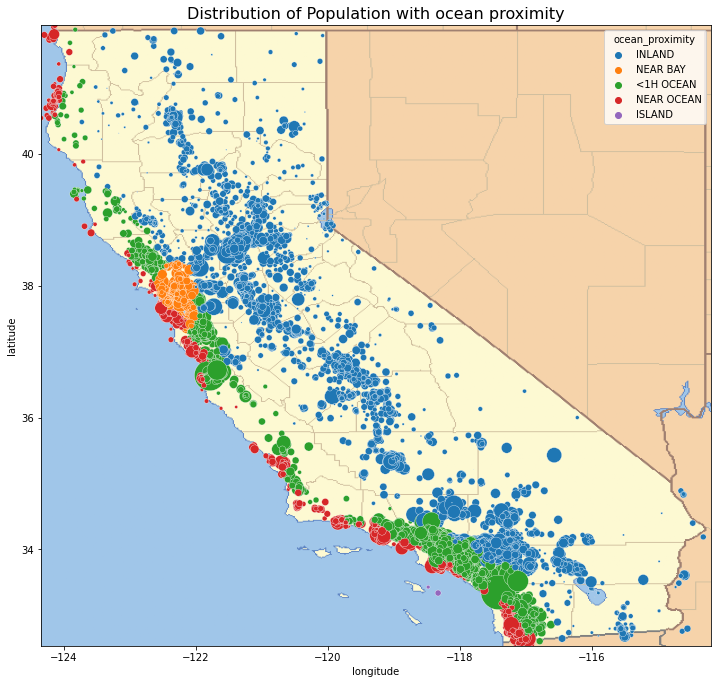

In [24]:
plt.figure(figsize=(12,12))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])
sns.scatterplot(data = df, x = 'longitude',y = 'latitude', hue = 'ocean_proximity', s=df['population']/30)
plt.title("Distribution of Population with ocean proximity",size=16)

Text(0.5, 1.0, 'Distribution of Population with county')

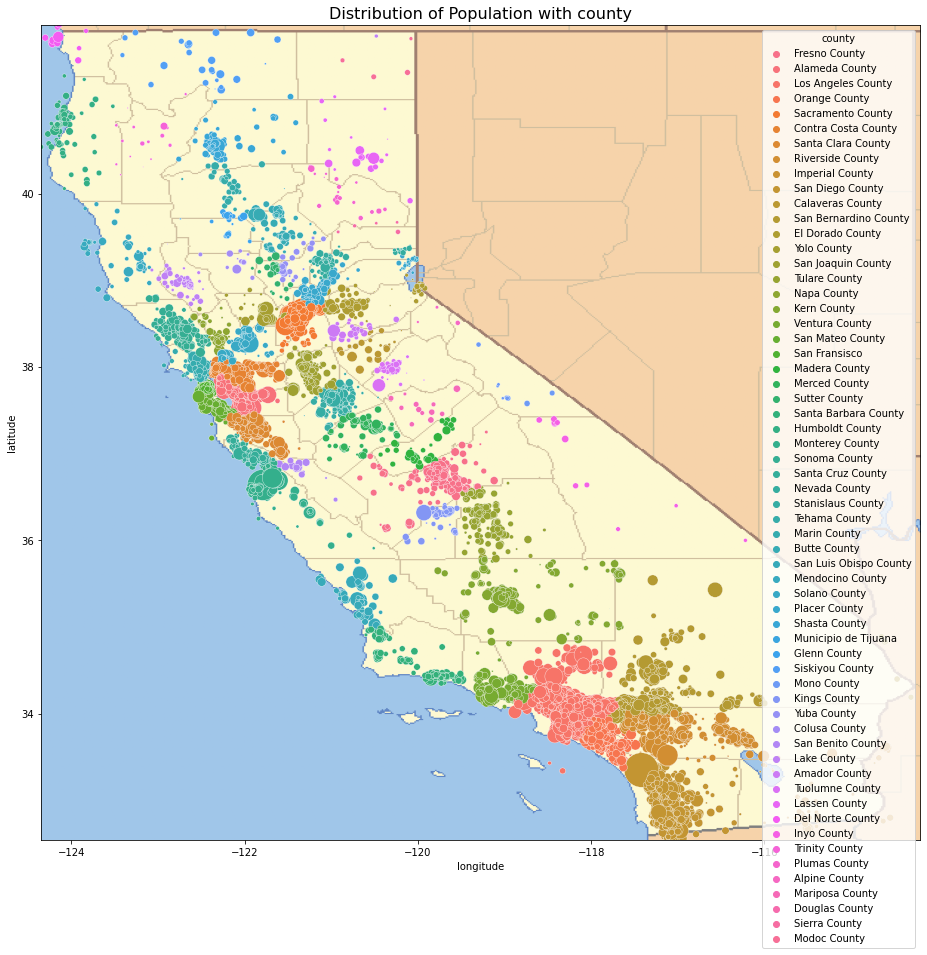

In [25]:
plt.figure(figsize=(20,15))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])
sns.scatterplot(data = df, x = 'longitude',y = 'latitude', hue = 'county', s=df['population']/30)
plt.title("Distribution of Population with county",size=16)

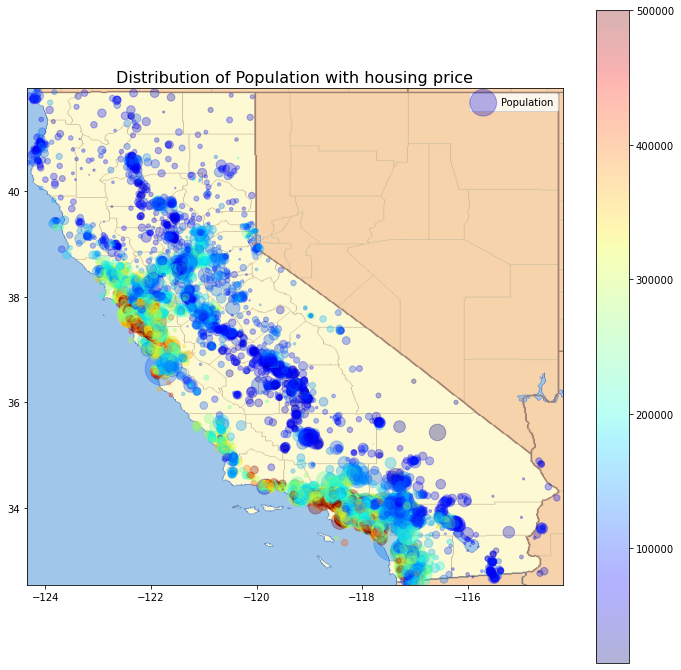

In [26]:
plt.figure(figsize=(12,12))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=df['longitude'],y=df['latitude'],alpha=0.3,s=df['population']/25,c=df['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of Population with housing price",size=16)
plt.legend()

Dari 3 plot di atas dapat di simpulkan bahwa :
1. Harga rumah sangat terpengaruh oleh lokasi dan kepadatan penduduknya
1. Tidak semua rumah yang berlokasi dekat dengan laut memiliki harga yang tinggi

In [27]:
df.groupby('county').max().sort_values('median_house_value', ascending = False)

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
county,,,,,,,,,,
Alameda County,NEAR BAY,-121.62,37.90,52.0,28258.0,3864.0,12203.0,3701.0,13.4990,500001.0
San Bernardino County,INLAND,-114.31,35.54,52.0,22128.0,4095.0,10450.0,3832.0,10.8634,500001.0
Ventura County,NEAR OCEAN,-118.64,34.70,52.0,25187.0,3521.0,11956.0,3478.0,12.6320,500001.0
Orange County,NEAR OCEAN,-117.49,33.94,52.0,16590.0,2696.0,7111.0,2419.0,15.0001,500001.0
Marin County,NEAR OCEAN,-122.42,38.28,52.0,10839.0,2123.0,5917.0,2060.0,12.2547,500001.0
Contra Costa County,NEAR BAY,-121.60,38.06,52.0,17032.0,2826.0,7653.0,2579.0,15.0001,500001.0
Riverside County,INLAND,-114.57,34.02,52.0,30450.0,5033.0,13251.0,4616.0,9.4356,500001.0
Santa Clara County,NEAR OCEAN,-121.37,37.46,52.0,12855.0,3226.0,8793.0,3052.0,15.0001,500001.0
Los Angeles County,NEAR OCEAN,-117.71,34.77,52.0,32054.0,5290.0,15507.0,5050.0,15.0001,500001.0


In [28]:
df.groupby('ocean_proximity').max().sort_values('median_house_value', ascending = False)

,county,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,,
<1H OCEAN,Ventura County,-116.62,41.88,52.0,32627.0,6445.0,35682.0,6082.0,15.0001,500001.0
INLAND,Yuba County,-114.31,41.86,52.0,27870.0,5027.0,11935.0,4855.0,15.0001,500001.0
NEAR BAY,Sonoma County,-122.01,38.34,52.0,18634.0,3226.0,8117.0,3052.0,15.0001,500001.0
NEAR OCEAN,Ventura County,-116.97,41.95,52.0,30405.0,4585.0,12873.0,4176.0,15.0001,500001.0
ISLAND,Los Angeles County,-118.33,33.43,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0


Dari Compare 2 tabel di atas saya asumsikan tidak semua rumah yang lokasinya dekat dengan laut memiliki harga yang tinggi dan tidak semua rumah yang lokasinya jauh memiliki harga yang relatif 

> ## Data Correlation

In [29]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925158,-0.117501,0.057288,0.079059,0.108161,0.064218,-0.010093,-0.045777
latitude,-0.925158,1.000000,0.020830,-0.048514,-0.076247,-0.117704,-0.080046,-0.085176,-0.143957
housing_median_age,-0.117501,0.020830,1.000000,-0.367868,-0.328218,-0.299736,-0.312394,-0.120396,0.103863
total_rooms,0.057288,-0.048514,-0.367868,1.000000,0.929750,0.853460,0.919292,0.199549,0.131972
total_bedrooms,0.079059,-0.076247,-0.328218,0.929750,1.000000,0.871812,0.975467,-0.004124,0.045633
population,0.108161,-0.117704,-0.299736,0.853460,0.871812,1.000000,0.905061,0.006284,-0.026183
households,0.064218,-0.080046,-0.312394,0.919292,0.975467,0.905061,1.000000,0.016365,0.061581
median_income,-0.010093,-0.085176,-0.120396,0.199549,-0.004124,0.006284,0.016365,1.000000,0.693273
median_house_value,-0.045777,-0.143957,0.103863,0.131972,0.045633,-0.026183,0.061581,0.693273,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

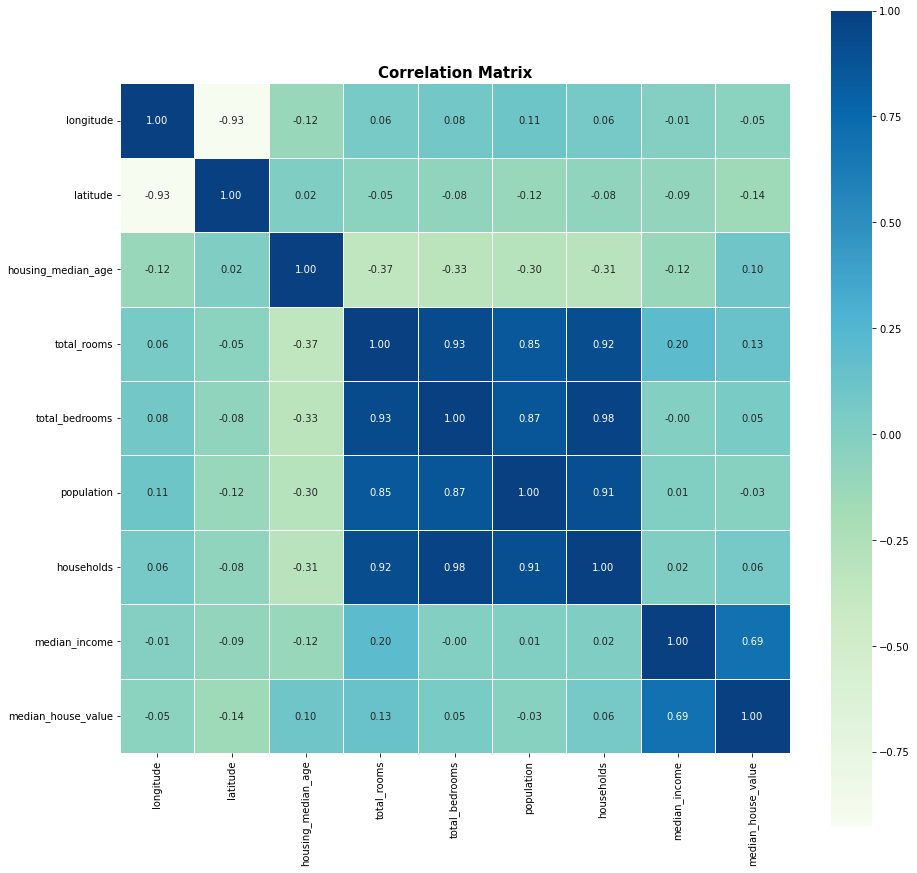

In [30]:
# Correlation matrix
plt.figure(figsize=(15, 15))
palette = sns.color_palette("GnBu", as_cmap=True)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', square=True, linewidths=.5, cmap = palette)
plt.title('Correlation Matrix', size=15, weight='bold')

Text(0.5, 1.0, 'Pair Plot antar Feature')

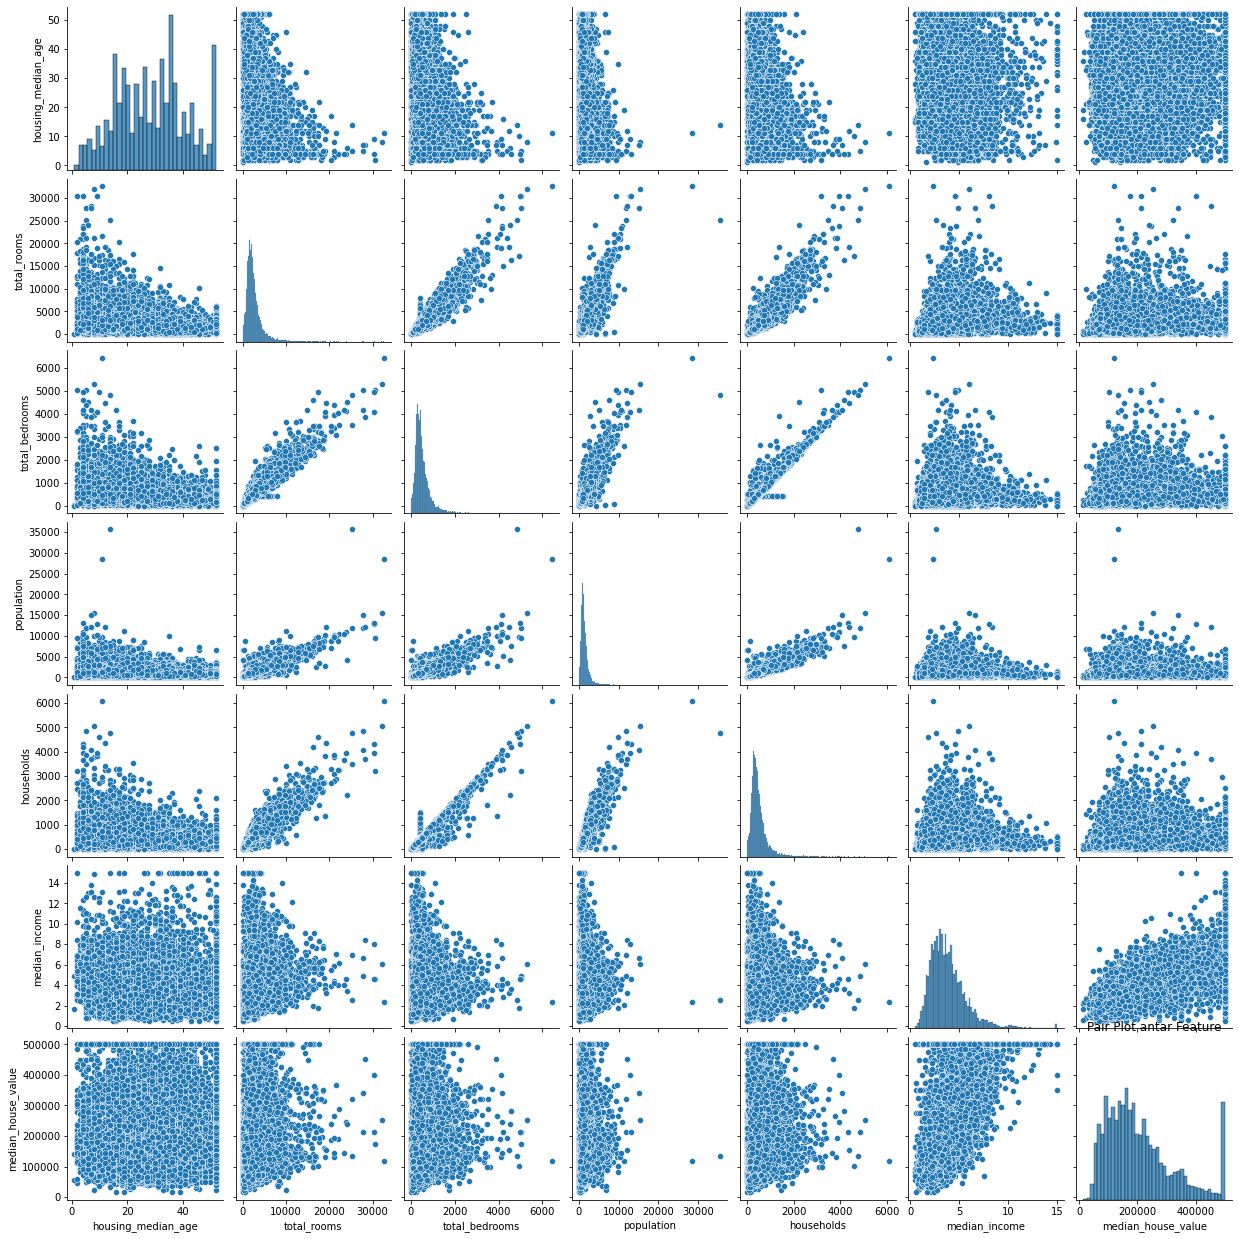

In [31]:
sns.pairplot(df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']])
plt.title('Pair Plot antar Feature')

In [32]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.693273
total_rooms           0.131972
housing_median_age    0.103863
households            0.061581
total_bedrooms        0.045633
population           -0.026183
longitude            -0.045777
latitude             -0.143957
Name: median_house_value, dtype: float64

Dari plot correlation matrix di atas terlihat bahwa hanya feature ```median_income``` saja yang memiliki nilai korelasi yang cukup tinggi terhadap feature ```median_house_value```. dimana korelasinya adalah positif dimana tiap kenaikan ```median_income``` semakin meningkat pula niali ```median_house_value``` atau semakin tinggi pendapatan penduduk akan semakin tinggi harga rumah di daerah tersebut.

> ## Outlier

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

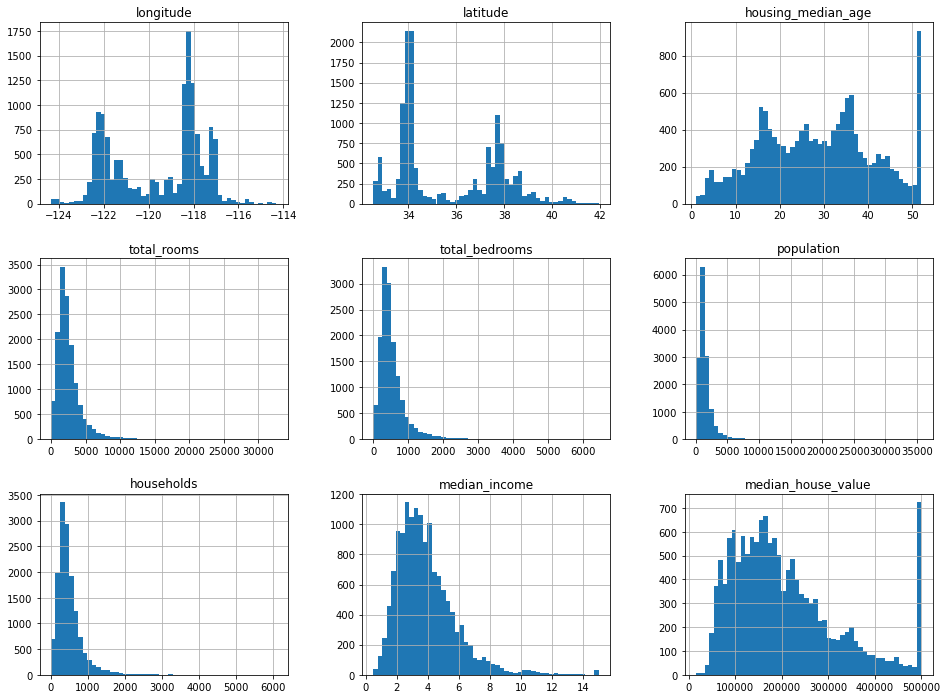

In [33]:
hist_b_ho = df.hist(bins=50,figsize=(16,12))
hist_b_ho

In [34]:
num_feat = ['housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value']

In [35]:
def find_outlier(df, feature):
    print('Outlier ' + feature)
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')
    print('_________________________')

In [36]:
find_outlier(df,"housing_median_age")

Outlier housing_median_age
IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5
_________________________


In [37]:
for i in num_feat :
    find_outlier(df, i)

Outlier housing_median_age
IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5
_________________________
Outlier total_rooms
IQR: 1697.0
limit_bawah: -1094.5
limit_atas: 5693.5
_________________________
Outlier total_bedrooms
IQR: 349.0
limit_bawah: -227.5
limit_atas: 1168.5
_________________________
Outlier population
IQR: 940.0
limit_bawah: -626.0
limit_atas: 3134.0
_________________________
Outlier households
IQR: 325.0
limit_bawah: -208.5
limit_atas: 1091.5
_________________________
Outlier median_income
IQR: 2.1655000000000006
limit_bawah: -0.6776500000000012
limit_atas: 7.984350000000001
_________________________
Outlier median_house_value
IQR: 144300.0
limit_bawah: -96850.0
limit_atas: 480350.0
_________________________


In [38]:
out1 = df[df['housing_median_age'] >= 65.5]
out2 = df[df['total_rooms'] > 5693.5]
out3 = df[df['total_bedrooms'] > 1168.5]
out4 = df[df['population'] > 3134.0]
out5 = df[df['households'] > 1091.5]
out6 = df[df['median_income'] > 7.984350000000001]
out7 = df[df['median_house_value'] > 480350.0]

In [39]:
out_all = pd.concat([out1, out2, out3, out4, out5, out6, out7], axis = 0)
out_all.drop_duplicates(inplace=True)

In [40]:
out_all

,ocean_proximity,county,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5,<1H OCEAN,Orange County,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,283200.0
9,NEAR BAY,Contra Costa County,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666,272400.0
13,INLAND,Riverside County,-117.50,33.96,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,139200.0
22,INLAND,Sacramento County,-121.53,38.61,5.0,8149.0,1913.0,2933.0,1616.0,3.6788,178800.0
45,INLAND,Riverside County,-117.59,33.91,7.0,10223.0,1491.0,5205.0,1509.0,5.4872,203400.0
...,...,...,...,...,...,...,...,...,...,...,...
14325,<1H OCEAN,Los Angeles County,-118.44,34.07,26.0,3535.0,748.0,1322.0,666.0,7.1674,500001.0
14328,<1H OCEAN,Los Angeles County,-118.46,34.06,46.0,1302.0,215.0,482.0,226.0,7.0674,500001.0
14377,<1H OCEAN,Los Angeles County,-118.46,34.08,35.0,3247.0,525.0,1065.0,484.0,7.8426,500001.0
14411,NEAR OCEAN,San Diego County,-117.31,33.00,30.0,1631.0,310.0,665.0,297.0,6.8443,492500.0


In [41]:
out_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 5 to 14446
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ocean_proximity     2095 non-null   object 
 1   county              2095 non-null   object 
 2   longitude           2095 non-null   float64
 3   latitude            2095 non-null   float64
 4   housing_median_age  2095 non-null   float64
 5   total_rooms         2095 non-null   float64
 6   total_bedrooms      2095 non-null   float64
 7   population          2095 non-null   float64
 8   households          2095 non-null   float64
 9   median_income       2095 non-null   float64
 10  median_house_value  2095 non-null   float64
dtypes: float64(9), object(2)
memory usage: 196.4+ KB


In [42]:
print('Persentage Outlier')
len(out_all)/len(df)*100

Persentage Outlier


14.500276854928018

Dari pengecekan outlier di atas kita mendapatkan hasil Total outlier adalah 2095 atau 14.5% dari total data

Bila semua outlier di drop akan sangat banyak data yang hilang, oleh sebab itu saya memutuskan untuk menghapus beberapa outlier yang memiliki nilai yang relatif tinggi di banding data lain. outlier yang akan di hilangkan akan di interpretasikan pada boxplot di bawah ini

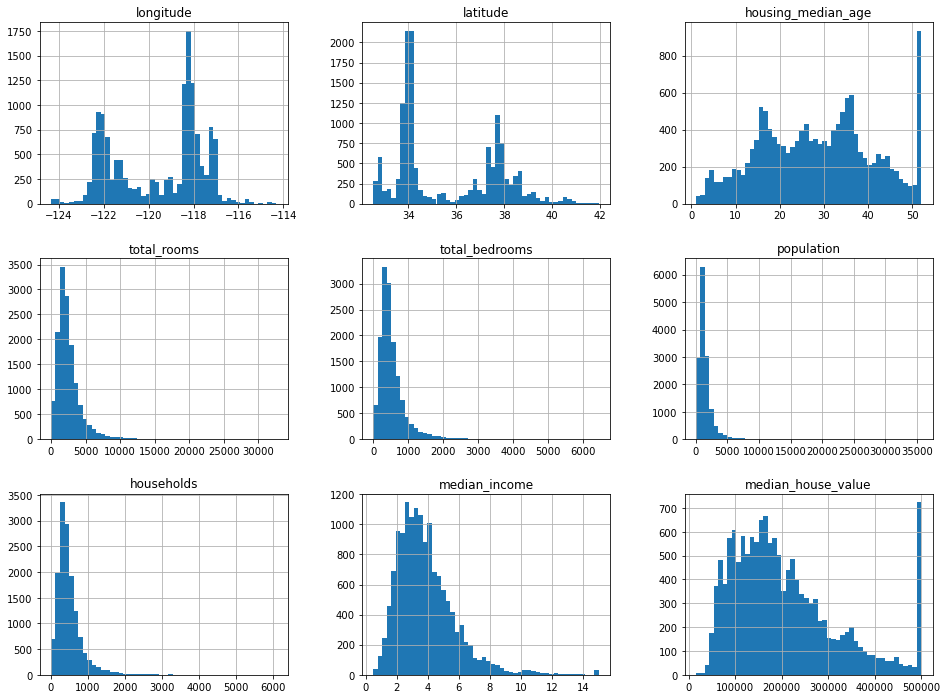

In [43]:
hist_a_ho = df.hist(bins=50,figsize=(16,12))
hist_a_ho
plt.show()

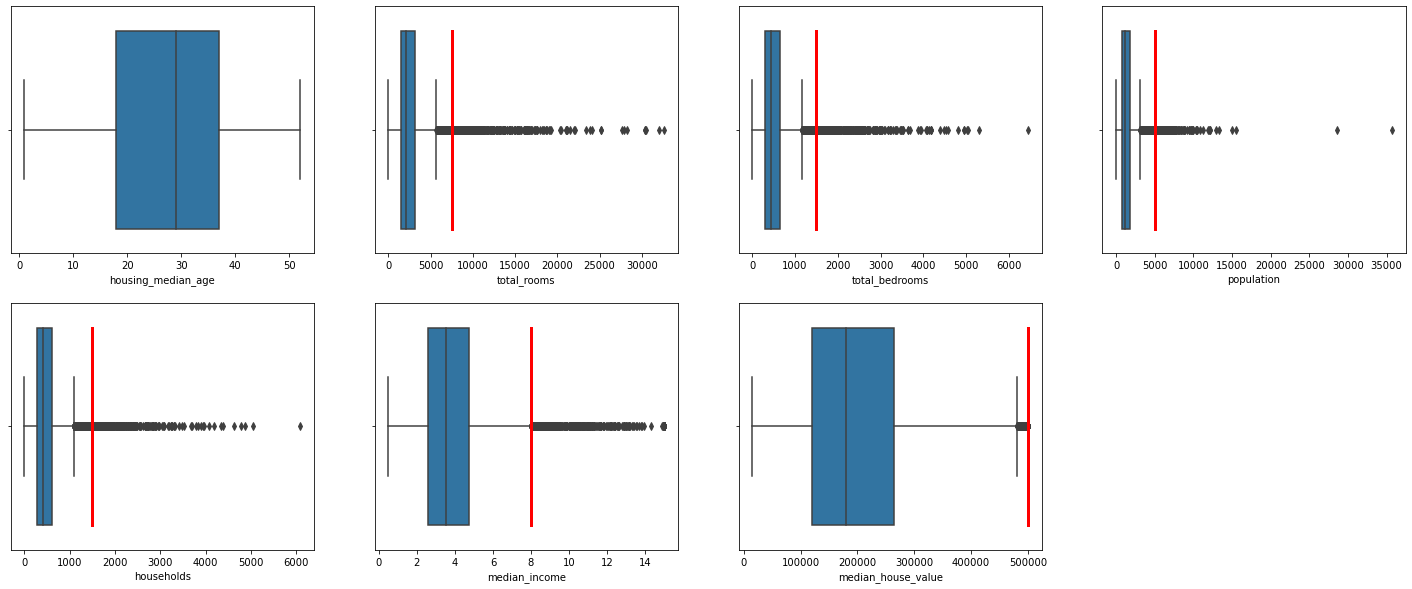

In [44]:
plt.figure(figsize=(25,10))
plt.subplot(2,4,1)
sns.boxplot(df['housing_median_age'])
plt.subplot(2,4,2)
sns.boxplot(df['total_rooms'])
plt.plot([7500, 7500], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,3)
sns.boxplot(df['total_bedrooms'])
plt.plot([1500, 1500], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,4)
sns.boxplot(df['population'])
plt.plot([5000, 5000], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,5)
sns.boxplot(df['households'])
plt.plot([1500, 1500], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,6)
sns.boxplot(df['median_income'])
plt.plot([8, 8], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,7)
sns.boxplot(df['median_house_value'])
plt.plot([500000, 500000], [-0.4, 0.4], linewidth=3, c='r')
plt.show()

Outlier yang akan di hilangkan adalah outlier yang melebihi garis merah karena memiliki jarak antar data yang relatif tinggi, untuk feature median house value di batasi sampai value 500.000, untuk membatasi model prediksi.

In [45]:
out1 = df[df['total_rooms'] > 7500]
out2 = df[df['total_bedrooms'] > 1500]
out3 = df[df['population'] > 5000]
out4 = df[df['households'] > 1500]
out5 = df[df['median_income'] > 8]
out6 = df[df['median_house_value'] > 500000]

out_all = pd.concat([out1, out2, out3, out4, out5, out6], axis = 0)
out_all.drop_duplicates(inplace=True)

In [46]:
out_all

,ocean_proximity,county,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5,<1H OCEAN,Orange County,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,283200.0
9,NEAR BAY,Contra Costa County,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666,272400.0
13,INLAND,Riverside County,-117.50,33.96,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,139200.0
22,INLAND,Sacramento County,-121.53,38.61,5.0,8149.0,1913.0,2933.0,1616.0,3.6788,178800.0
45,INLAND,Riverside County,-117.59,33.91,7.0,10223.0,1491.0,5205.0,1509.0,5.4872,203400.0
...,...,...,...,...,...,...,...,...,...,...,...
14302,NEAR BAY,San Fransisco,-122.42,37.80,52.0,741.0,170.0,277.0,165.0,4.4712,500001.0
14325,<1H OCEAN,Los Angeles County,-118.44,34.07,26.0,3535.0,748.0,1322.0,666.0,7.1674,500001.0
14328,<1H OCEAN,Los Angeles County,-118.46,34.06,46.0,1302.0,215.0,482.0,226.0,7.0674,500001.0
14377,<1H OCEAN,Los Angeles County,-118.46,34.08,35.0,3247.0,525.0,1065.0,484.0,7.8426,500001.0


In [47]:
out_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 5 to 14413
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ocean_proximity     1393 non-null   object 
 1   county              1393 non-null   object 
 2   longitude           1393 non-null   float64
 3   latitude            1393 non-null   float64
 4   housing_median_age  1393 non-null   float64
 5   total_rooms         1393 non-null   float64
 6   total_bedrooms      1393 non-null   float64
 7   population          1393 non-null   float64
 8   households          1393 non-null   float64
 9   median_income       1393 non-null   float64
 10  median_house_value  1393 non-null   float64
dtypes: float64(9), object(2)
memory usage: 130.6+ KB


In [48]:
print('Persentage Outlier')
len(out_all)/len(df)*100

Persentage Outlier


9.641472868217054

Dari pengecekan outlier yang akan dihilangkan di atas kita mendapatkan hasil Total outlier yang akan dihilangkan adalah 1393 atau 9.64% dari total data

> ## Handling Outlier
drop all outlier

In [49]:
df.drop(out_all.index, axis = 0, inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13055 entries, 0 to 14447
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ocean_proximity     13055 non-null  object 
 1   county              13055 non-null  object 
 2   longitude           13055 non-null  float64
 3   latitude            13055 non-null  float64
 4   housing_median_age  13055 non-null  float64
 5   total_rooms         13055 non-null  float64
 6   total_bedrooms      13055 non-null  float64
 7   population          13055 non-null  float64
 8   households          13055 non-null  float64
 9   median_income       13055 non-null  float64
 10  median_house_value  13055 non-null  float64
dtypes: float64(9), object(2)
memory usage: 1.2+ MB


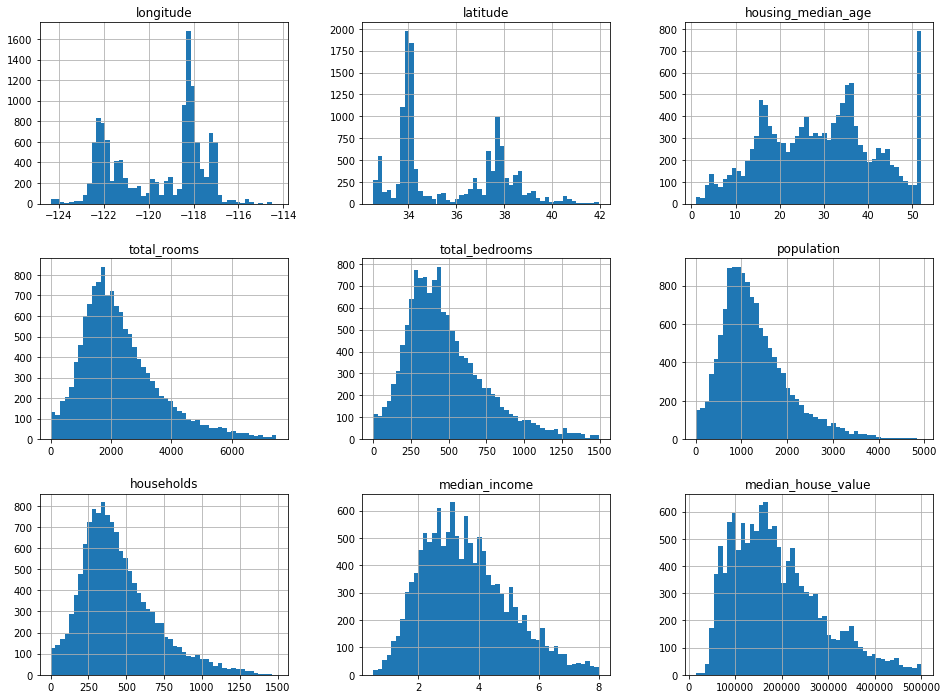

In [51]:
hist_a_ho = df.hist(bins=50,figsize=(16,12))
hist_a_ho
plt.show()

Terlihat dari tabel distribusi diatas bahwa pengurangan data yang outlier dapat membuat data menjadi lebih terdistribusi normal dari pada data sebelumnya

# Modeling

> ## Benchmark Model

In [52]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, StratifiedKFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, f1_score

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13055 entries, 0 to 14447
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ocean_proximity     13055 non-null  object 
 1   county              13055 non-null  object 
 2   longitude           13055 non-null  float64
 3   latitude            13055 non-null  float64
 4   housing_median_age  13055 non-null  float64
 5   total_rooms         13055 non-null  float64
 6   total_bedrooms      13055 non-null  float64
 7   population          13055 non-null  float64
 8   households          13055 non-null  float64
 9   median_income       13055 non-null  float64
 10  median_house_value  13055 non-null  float64
dtypes: float64(9), object(2)
memory usage: 1.2+ MB


In [54]:
df.describe(include = 'all')

,ocean_proximity,county,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,13055,13055,13055.000000,13055.000000,13055.00000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000
unique,5,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,<1H OCEAN,Los Angeles County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5671,3587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-119.580899,35.670202,29.01509,2300.133282,478.175642,1288.318805,447.219763,3.587721,189269.053773
std,NaN,NaN,2.005525,2.160803,12.28545,1298.658210,264.097702,732.872589,245.549974,1.446815,95703.013959
min,NaN,NaN,-124.350000,32.540000,1.00000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,NaN,NaN,-121.770000,33.940000,19.00000,1408.000000,293.000000,781.000000,276.000000,2.502700,114700.000000
50%,NaN,NaN,-118.520000,34.280000,29.00000,2043.000000,428.000000,1149.000000,401.000000,3.402800,171400.000000
75%,NaN,NaN,-118.010000,37.730000,37.00000,2937.500000,613.000000,1657.000000,574.000000,4.503300,243500.000000


Processing Scheme

1. target : median_hausing_value
1. BinaryEncoder : county
1. RobustScaler : housing_median_age, total_rooms, total_bedrooms, population, households, median_income
1. Out : longitude, latitude, ocean_proximity
    - karena latitude longitude dan ocean_proximity adalah feature yang informasikan tentang lokasi, untuk feature yang memiliki informasi tentang lokasi akan di interpretasikan oleh feature county

In [55]:
X = df.drop(['median_house_value', 'longitude', 'latitude', 'ocean_proximity'], axis = 1)
y = df['median_house_value']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, 
                                    y,
                                    test_size = 0.3, 
                                    random_state = 2022)

In [57]:
X_train

,county,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10468,Kern County,20.0,3268.0,833.0,1622.0,758.0,1.3587
332,Santa Barbara County,43.0,1802.0,557.0,1490.0,538.0,2.6750
5866,Alameda County,49.0,2026.0,548.0,963.0,521.0,1.9805
5209,Contra Costa County,16.0,2176.0,464.0,1410.0,434.0,3.5436
10069,Alameda County,44.0,1613.0,339.0,776.0,346.0,3.1103
...,...,...,...,...,...,...,...
7104,Sonoma County,14.0,4143.0,656.0,1569.0,629.0,3.9766
5233,Los Angeles County,35.0,1646.0,294.0,1056.0,280.0,3.0550
192,Mendocino County,52.0,1370.0,258.0,617.0,228.0,2.5500
1372,San Fransisco,52.0,1507.0,282.0,929.0,281.0,3.8958


In [58]:
onehot = OneHotEncoder()
scaler = RobustScaler()
binary = ce.BinaryEncoder()

transformer = ColumnTransformer([
                ('binary', binary, ['county']),
                ('scaler', scaler, ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])   
], remainder = "passthrough")

In [59]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(), ['county']),
                                ('scaler', RobustScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income'])])

In [60]:
# Define algoritma yang digunakan
lr = LinearRegression()
ls = Lasso(random_state = 2022)
rd = Ridge(random_state = 2022)
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2022)
rf = RandomForestRegressor(random_state=2022)
ab = AdaBoostRegressor(random_state = 2022)
gbr = GradientBoostingRegressor(random_state = 2022)
xgb = XGBRegressor(random_state=2022)

In [61]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_ls = TransformedTargetRegressor(ls, func=np.log, inverse_func=np.exp)
log_rd = TransformedTargetRegressor(rd, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_ab = TransformedTargetRegressor(ab, func=np.log, inverse_func=np.exp)
log_gbr = TransformedTargetRegressor(gbr, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
list_model = {'Linier Regression' : log_lr, 'Lasso' : log_ls, 'Ridge' : log_rd, 'KNN' : log_knn, 'Decision Tree' : log_dt, 'Random Forest' : log_rf, 'AdaBoost' : log_ab, 'GradientBoost' : log_gbr, 'XGBoost' : log_xgb}

In [62]:
score_RMSE = []
nilai_mean_RMSE = []
nilai_std_RMSE = []
crossval = KFold(n_splits=5, shuffle=True, random_state=2022)
def model_eval_RMSE(model, metric):
    for i in model :
        estimator = Pipeline([
            ('transformer', transformer),
            ('model', list_model[i])
        ])
        model_cv = np.sqrt(-cross_val_score(estimator, X_train, y_train, cv = crossval, scoring = metric, error_score='raise'))
        score_RMSE.append(model_cv)
        nilai_mean_RMSE.append(model_cv.mean())
        nilai_std_RMSE.append(model_cv.std())

In [63]:
model_eval_RMSE(list_model, 'neg_mean_squared_error')

In [64]:
score_MAE = []
nilai_mean_MAE = []
nilai_std_MAE = []
crossval = KFold(n_splits=5, shuffle=True, random_state=2022)
def model_eval_MAE(model, metric):
    for i in model :
        estimator = Pipeline([
            ('transformer', transformer),
            ('model', list_model[i])
        ])
        model_cv = (-cross_val_score(estimator, X_train, y_train, cv = crossval, scoring = metric, error_score='raise'))
        score_MAE.append(model_cv)
        nilai_mean_MAE.append(model_cv.mean())
        nilai_std_MAE.append(model_cv.std())

In [65]:
model_eval_MAE(list_model, 'neg_mean_absolute_error')

In [66]:
pd.DataFrame({
    'RMSE_Score' : score_RMSE,
    'Mean_RMSE': nilai_mean_RMSE,
    'Std_RMSE': nilai_std_RMSE,
    'MAE_Score' : score_MAE,
    'Mean_MAE': nilai_mean_MAE,
    'Std_MAE': nilai_std_MAE
}, index=list_model.keys())

,RMSE_Score,Mean_RMSE,Std_RMSE,MAE_Score,Mean_MAE,Std_MAE
Linier Regression,"[66054.65694875059, 66614.4690661461, 70343.64...",67169.819319,1993.587407,"[47129.01901997302, 47346.55617546952, 50000.0...",47832.831581,1403.643334
Lasso,"[98035.78825975995, 101810.87625237081, 98249....",98871.906701,1475.336771,"[74561.28236590301, 78455.37305123862, 74551.3...",75439.865396,1520.573616
Ridge,"[66055.21712363772, 66617.41112380024, 70329.7...",67163.240647,1988.743565,"[47129.873360688965, 47348.75143802321, 49992....",47830.617840,1400.624457
KNN,"[56274.4667028554, 57855.92599559011, 57980.52...",56188.919566,1607.726894,"[38529.59502693026, 39236.0632343744, 39189.26...",38148.086309,1073.845851
Decision Tree,"[77376.29974941185, 81568.95215179751, 84303.0...",81025.875550,2353.283980,"[52806.40098468271, 56958.15098468271, 59085.1...",56577.028163,2111.863955
Random Forest,"[56982.34665918196, 56534.987550028505, 60632....",57534.202363,1587.802989,"[38610.65610755538, 38813.51282513988, 41879.9...",39543.486970,1240.593278
AdaBoost,"[76952.81548359142, 78688.75087084211, 79554.6...",77042.526034,1981.723987,"[55609.90596859946, 57967.02003622269, 57988.4...",56511.908546,1237.165385
GradientBoost,"[60571.706791722354, 61332.22125124919, 63000....",60325.978170,1909.342159,"[42079.52152247285, 42873.41884529461, 43975.6...",42123.087753,1329.828869
XGBoost,"[55269.5662784659, 54492.844218890416, 56330.5...",54394.027691,1324.237047,"[37736.37101895856, 37518.44756479075, 38790.6...",37428.872232,858.714080


ada 9 model yang di uji dalam pemilihan model :
1. Linier Regression	
2. Lasso
3. Ridge
3. KNN
4. Decision Tree	
5. Random Forest	
6. Adaptive Boost
7. Gradient boost
7. Extreme Boost

2 model dengan hasil RMSE, dan MAE terbaik adalah :
1. KNN
2. Extreme Boost

Selanjutnya 2 model terbaik akan di lakukan pengujuan dengan data test dan akan di lakukan hyperparameter tuning pada kedua model tsb

> ## Benchmark 2 model terbaik dengan X_Test

In [67]:
# Benchmark 2 model terbaik
models = {
    'KNN' : KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=2022)
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = [] 

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 
                                    'MAE': score_mae, 
                                    'MAPE': score_mape,
                                    'R-Squared' : score_r2
                                   }, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE,R-Squared
KNN,53369.783271,37341.537452,0.223680,0.683370
XGBoost,53829.127431,38016.790481,0.237315,0.677896


Dari hasil pengujian dengan data test terlihat KNN menguguli XGBoost di semua matric. tetapi untuk membuktikannya saya akan melakukan hyperparameter Tuning ke kedua modul untuk memastikan model mana yang memiliki performance terbaik

# Hyperparameter Tuning

> ## Hyperparameter Tuning KNN

In [68]:
# Total Tetangga
n_neighbors = list(np.arange(8, 21))

# Bobot KNN
weights = ['uniform', 'distance']

# Jumlah daun
leaf_size = list(np.arange(20, 41))

# Algoritma KNN
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Hyperparam space XGboost
hyperparam_space_knn = {
    'model__n_neighbors': n_neighbors, 
    'model__weights': weights,
    'model__leaf_size': leaf_size,
    'model__algorithm': algorithm
}

In [69]:
model = KNeighborsRegressor()

# Membuat algorithm chains
estimator_knn = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_knn = RandomizedSearchCV(
    estimator_knn, 
    param_distributions = hyperparam_space_knn,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 2022 
)

In [70]:
random_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(),
                                                                               ['county']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                     

In [71]:
pd.DataFrame(random_knn.cv_results_).sort_values(by = ['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__weights,param_model__n_neighbors,param_model__leaf_size,param_model__algorithm,params,split0_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
33,0.091943,0.015374,0.399323,0.074023,distance,12,32,auto,"{'model__weights': 'distance', 'model__n_neigh...",-53293.433631,...,449.640669,8,-0.223573,-0.233081,-0.223354,-0.218331,-0.233460,-0.226360,0.005947,8
45,0.045605,0.004084,0.597217,0.057156,distance,12,35,brute,"{'model__weights': 'distance', 'model__n_neigh...",-53293.433631,...,449.640669,8,-0.223573,-0.233081,-0.223354,-0.218331,-0.233460,-0.226360,0.005947,8
28,0.078401,0.008980,0.768790,0.068033,distance,11,24,brute,"{'model__weights': 'distance', 'model__n_neigh...",-53371.931055,...,425.304831,7,-0.222894,-0.232274,-0.220907,-0.217355,-0.233152,-0.225316,0.006301,7
29,0.143284,0.034460,0.351635,0.022817,distance,10,30,auto,"{'model__weights': 'distance', 'model__n_neigh...",-53530.059791,...,456.367375,5,-0.221965,-0.231972,-0.220453,-0.217974,-0.232716,-0.225016,0.006122,5
47,0.044800,0.005878,0.454334,0.009200,distance,10,26,brute,"{'model__weights': 'distance', 'model__n_neigh...",-53530.059791,...,456.367375,5,-0.221965,-0.231972,-0.220453,-0.217974,-0.232716,-0.225016,0.006122,5


In [72]:
print('KNN Tuning')
print('Best_score:', random_knn.best_score_*-1)
print('Best_params:', random_knn.best_params_)

KNN Tuning
Best_score: 54739.10933189535
Best_params: {'model__weights': 'distance', 'model__n_neighbors': 12, 'model__leaf_size': 32, 'model__algorithm': 'auto'}


In [73]:
model = random_knn.best_estimator_
crossval = KFold(n_splits=5, shuffle=True, random_state=2022)

score_RMSE = []
nilai_mean_RMSE = []
nilai_std_RMSE = []

model_cv = np.sqrt(-cross_val_score(model, X_train, y_train, cv = crossval, scoring = 'neg_mean_squared_error'))
score_RMSE.append(model_cv)
nilai_mean_RMSE.append(model_cv.mean())
nilai_std_RMSE.append(model_cv.std())

score_MAE = []
nilai_mean_MAE = []
nilai_std_MAE = []

model_cv = (-cross_val_score(model, X_train, y_train, cv = crossval, scoring = 'neg_mean_absolute_error'))
score_MAE.append(model_cv)
nilai_mean_MAE.append(model_cv.mean())
nilai_std_MAE.append(model_cv.std())

score_R_Squared = []

model_cv = (cross_val_score(model, X_train, y_train, cv = crossval, scoring = 'r2'))
score_R_Squared.append(model_cv)

print('KNN Tuning Validation')
pd.DataFrame({
    'model' : 'KNN tuning',
    'RMSE_Score' : score_RMSE,
    'Mean_RMSE': nilai_mean_RMSE,
    'Std_RMSE': nilai_std_RMSE,
    'MAE_Score' : score_MAE,
    'Mean_MAE': nilai_mean_MAE,
    'Std_MAE': nilai_std_MAE,
    'R-Squared' : score_R_Squared
})

KNN Tuning Validation


,model,RMSE_Score,Mean_RMSE,Std_RMSE,MAE_Score,Mean_MAE,Std_MAE,R-Squared
0,KNN tuning,"[53844.390558398496, 56586.451483503784, 56718...",54616.923082,1726.559533,"[37713.27037714532, 39550.18991200129, 38958.3...",37912.33173,1180.477919,"[0.6800891186278137, 0.6701711793651705, 0.643..."


In [74]:
# Define model terhadap estimator terbaik
knn_tuning =  {'KNN tuning' : random_knn.best_estimator_}
compare_rmse_knn_tuning = []
compare_mae_knn_tuning = []
compare_mape_knn_tuning = []
compare_r2_knn_tuning = []

# Fitting model
knn_tuning['KNN tuning'].fit(X_train, y_train)

# Predict test set
y_pred_knn_tuning = knn_tuning['KNN tuning'].predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
compare_rmse_knn_tuning.append(np.sqrt(mean_squared_error(y_test, y_pred_knn_tuning)))
compare_mae_knn_tuning.append(mean_absolute_error(y_test, y_pred_knn_tuning))
compare_mape_knn_tuning.append(mean_absolute_percentage_error(y_test, y_pred_knn_tuning))
compare_r2_knn_tuning.append(r2_score(y_test, y_pred_knn_tuning))

knn_after_tuning = pd.DataFrame({'RMSE' :  compare_rmse_knn_tuning,
                                 'MAE' : compare_mae_knn_tuning, 
                                 'MAPE' : compare_mape_knn_tuning, 
                                 'R-Squared' : compare_r2_knn_tuning
                                }, index = knn_tuning.keys())
print('KNN tuning test')
knn_after_tuning

KNN tuning test


,RMSE,MAE,MAPE,R-Squared
KNN tuning,52050.007468,36555.004252,0.222139,0.698836


In [75]:
knn_before_tuning = pd.DataFrame(score_before_tuning.loc['KNN']).T
print('before tuning')
knn_before_tuning

before tuning


,RMSE,MAE,MAPE,R-Squared
KNN,53369.783271,37341.537452,0.22368,0.68337


Dari hasil parameter tuning KNN seletah di Tuning memperlihatkan performa yang lebih baik di bandingkan dengan KNN sebelum dilakukan tuning

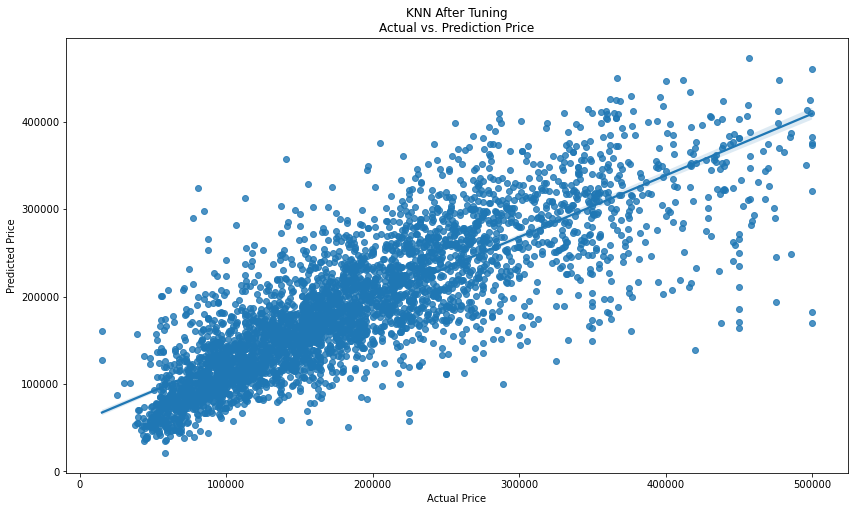

In [76]:
plt.figure(figsize=(14, 8))
plot = sns.regplot(x=y_test, y=y_pred).set(title='KNN After Tuning\nActual vs. Prediction Price',
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

dari plot di atas data actual dan predict terlihat bahwa dari data di bawah 250000 data terlihat cukup padat di dekat garis regresi, namun di atas 250.000 hasil predict mulai menyebar menjauhi garis regresi yang artinya memiliki nilai bias yang cukup tinggi

> ## Hyperparameter Tuning XGBoost

In [77]:
# Kedalaman pohon
max_depth = list(np.arange(15, 31))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 251))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 11/10))

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [78]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=2022)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 2022 
)

In [79]:
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(),
                                                                               ['county']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                     

In [80]:
pd.DataFrame(random_xgb.cv_results_).sort_values(by = ['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,25.014087,0.904273,0.032000,0.008763,0.3,0.001,204,29,0.04,6,...,386.841705,1,-0.241703,-0.237567,-0.239500,-0.233496,-0.246219,-0.239697,0.004233,4
5,27.616880,0.537560,0.040001,0.005060,0.7,0.464159,195,22,0.09,6,...,502.989777,2,-0.236583,-0.234781,-0.239836,-0.228591,-0.244765,-0.236912,0.005369,3
0,29.906146,0.809004,0.039200,0.002993,0.7,1.29155,159,30,0.1,3,...,901.676527,4,-0.244761,-0.233797,-0.246829,-0.227021,-0.246875,-0.239856,0.008042,5
38,31.217641,1.060270,0.036000,0.005657,0.6,1.29155,210,24,0.11,4,...,669.427248,5,-0.248048,-0.238462,-0.248616,-0.233721,-0.250996,-0.243968,0.006678,6
21,12.828923,1.036727,0.026400,0.003200,0.8,0.021544,107,18,0.07,7,...,675.566128,3,-0.238082,-0.231678,-0.243284,-0.227307,-0.243627,-0.236795,0.006429,2
32,26.490295,0.719038,0.032800,0.007756,0.4,0.16681,214,24,0.18,3,...,934.438828,7,-0.272344,-0.258501,-0.269465,-0.260932,-0.268817,-0.266012,0.005331,9
6,16.215387,0.943599,0.026648,0.002209,0.3,1.29155,183,15,0.16,5,...,634.541625,9,-0.272084,-0.267809,-0.275591,-0.267633,-0.280490,-0.272721,0.004879,15
33,29.460880,0.715218,0.034367,0.006948,0.4,0.16681,216,26,0.19,5,...,706.026874,8,-0.273829,-0.263149,-0.271208,-0.259270,-0.275593,-0.268610,0.006322,11
48,21.762630,0.971458,0.024801,0.002993,0.9,0.16681,174,20,0.38,5,...,570.680816,6,-0.251236,-0.261217,-0.264920,-0.252124,-0.266922,-0.259284,0.006479,7
35,30.708345,1.752685,0.032800,0.004665,0.6,1.29155,204,22,0.33,6,...,816.569422,14,-0.277951,-0.271838,-0.270847,-0.266247,-0.271580,-0.271692,0.003730,13


In [81]:
print('XGBoost')
print('Best_score:', random_xgb.best_score_*-1)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: 55615.33912091367
Best_params: {'model__subsample': 0.3, 'model__reg_alpha': 0.001, 'model__n_estimators': 204, 'model__max_depth': 29, 'model__learning_rate': 0.04, 'model__gamma': 6, 'model__colsample_bytree': 1.0}


In [82]:
model = random_xgb.best_estimator_
crossval = KFold(n_splits=5, shuffle=True, random_state=2022)

score_RMSE = []
nilai_mean_RMSE = []
nilai_std_RMSE = []

model_cv = np.sqrt(-cross_val_score(model, X_train, y_train, cv = crossval, scoring = 'neg_mean_squared_error'))
score_RMSE.append(model_cv)
nilai_mean_RMSE.append(model_cv.mean())
nilai_std_RMSE.append(model_cv.std())

score_MAE = []
nilai_mean_MAE = []
nilai_std_MAE = []

model_cv = (-cross_val_score(model, X_train, y_train, cv = crossval, scoring = 'neg_mean_absolute_error'))
score_MAE.append(model_cv)
nilai_mean_MAE.append(model_cv.mean())
nilai_std_MAE.append(model_cv.std())

score_R_Squared = []

model_cv = (cross_val_score(model, X_train, y_train, cv = crossval, scoring = 'r2'))
score_R_Squared.append(model_cv)

print('XGBoost Tuning Validation')
pd.DataFrame({
    'model' : 'XGBoost tuning',
    'RMSE_Score' : score_RMSE,
    'Mean_RMSE': nilai_mean_RMSE,
    'Std_RMSE': nilai_std_RMSE,
    'MAE_Score' : score_MAE,
    'Mean_MAE': nilai_mean_MAE,
    'Std_MAE': nilai_std_MAE,
    'R-Squared' : score_R_Squared
})

XGBoost Tuning Validation


,model,RMSE_Score,Mean_RMSE,Std_RMSE,MAE_Score,Mean_MAE,Std_MAE,R-Squared
0,XGBoost tuning,"[56352.69819822643, 54838.2922765127, 58612.62...",55972.624704,1444.979475,"[39681.238413737694, 38881.69844519284, 41922....",39737.10925,1166.77534,"[0.6495891773602354, 0.6902355853623046, 0.619..."


In [83]:
# Define model terhadap estimator terbaik
xgb_tuning =  {'XGBoost tuning' : random_xgb.best_estimator_}
compare_rmse_xgb_tuning = []
compare_mae_xgb_tuning = []
compare_mape_xgb_tuning = []
compare_r2_xgb_tuning = []

# Fitting model
xgb_tuning['XGBoost tuning'].fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning['XGBoost tuning'].predict(X_test)

# Simpan nilai metrics RMSE, MAE, MAPE & R2 setelah tuning
compare_rmse_xgb_tuning.append(np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning)))
compare_mae_xgb_tuning.append(mean_absolute_error(y_test, y_pred_xgb_tuning))
compare_mape_xgb_tuning.append(mean_absolute_percentage_error(y_test, y_pred_xgb_tuning))
compare_r2_xgb_tuning.append(r2_score(y_test, y_pred_xgb_tuning))

xgb_after_tuning = pd.DataFrame({'RMSE' :  compare_rmse_xgb_tuning, 
                                 'MAE' : compare_mae_xgb_tuning, 
                                 'MAPE' : compare_mape_xgb_tuning, 
                                 'R-Squared' : compare_r2_xgb_tuning
                                }, index=xgb_tuning.keys())
print('XGBoost tuning test')
xgb_after_tuning

XGBoost tuning test


,RMSE,MAE,MAPE,R-Squared
XGBoost tuning,54354.239314,38029.420765,0.235818,0.671581


In [84]:
xgb_before_tuning = pd.DataFrame(score_before_tuning.loc['XGBoost']).T
print('before tuning')
xgb_before_tuning

before tuning


,RMSE,MAE,MAPE,R-Squared
XGBoost,53829.127431,38016.790481,0.237315,0.677896


Dari hasil parameter tuning XGBoost seletah di Tuning memperlihatkan performa yang lebih baik di bandingkan dengan XGBoost sebelum dilakukan tuning

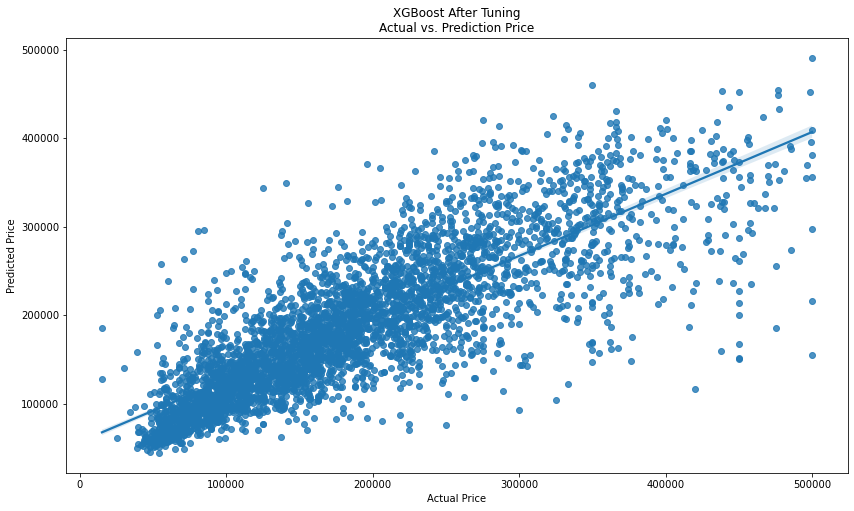

In [85]:
plt.figure(figsize=(14, 8))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning).set(title='XGBoost After Tuning\nActual vs. Prediction Price',
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

dari plot di atas data actual dan predict terlihat bahwa hasil predict mulai menyebar menjauhi garis regresi yang artinya memiliki nilai bias yang cukup tinggi

> ## Feature Importance XGBoost after Tuning

In [86]:
transformer.transformers_[0][1].get_feature_names()

['county_0', 'county_1', 'county_2', 'county_3', 'county_4', 'county_5']

In [87]:
transformer.transformers_[1][1].get_feature_names_out()

array(['housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income'], dtype=object)

In [88]:
features = list(transformer.transformers_[0][1].get_feature_names()) +  list(transformer.transformers_[1][1].get_feature_names_out())

In [89]:
features

['county_0',
 'county_1',
 'county_2',
 'county_3',
 'county_4',
 'county_5',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

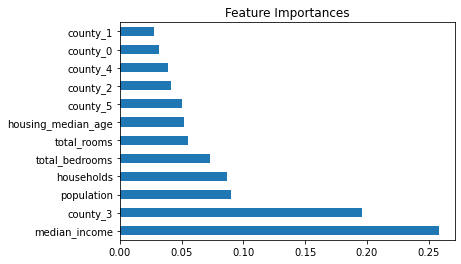

In [90]:
# Plot feature importances
xgb_feature_imp = pd.Series(xgb_tuning['XGBoost tuning']['model'].feature_importances_, features).sort_values(ascending = False)
xgb_feature_imp.plot(kind='barh', title='Feature Importances');

feature importance pada XGBoost menunjukan bahwa setiap feature memiliki nilai yang tidak terlalu jauh feature yang paling tinggi adalah ```median_income``` sedangkan yang paling kecil adalah ```housing_median_age``` meskipun nilai feature ```county_0``` lebih kecil di bandingkan ```housing_median_age``` tetapi niulai ```county_0``` memiliki nilai lebih besar.

**karna nilai antar feature tidak terlalu jauh saya memutuskan untuk tidak menghapus feature apapun pada model XGBoost.**

> ## Compare KNN dan XGBoost, before dan after tuning

In [91]:
pd.concat([xgb_before_tuning, xgb_after_tuning, knn_before_tuning, knn_after_tuning])

,RMSE,MAE,MAPE,R-Squared
XGBoost,53829.127431,38016.790481,0.237315,0.677896
XGBoost tuning,54354.239314,38029.420765,0.235818,0.671581
KNN,53369.783271,37341.537452,0.223680,0.683370
KNN tuning,52050.007468,36555.004252,0.222139,0.698836


dari tabel compare performance model, KNN yang sudah di tuning memiliki performance paling baik adalah KNN setalah di tuning

<AxesSubplot:title={'center':'XGBoost After Tuning\nActual vs. Prediction Price'}, xlabel='Actual Price', ylabel='Predicted Price'>

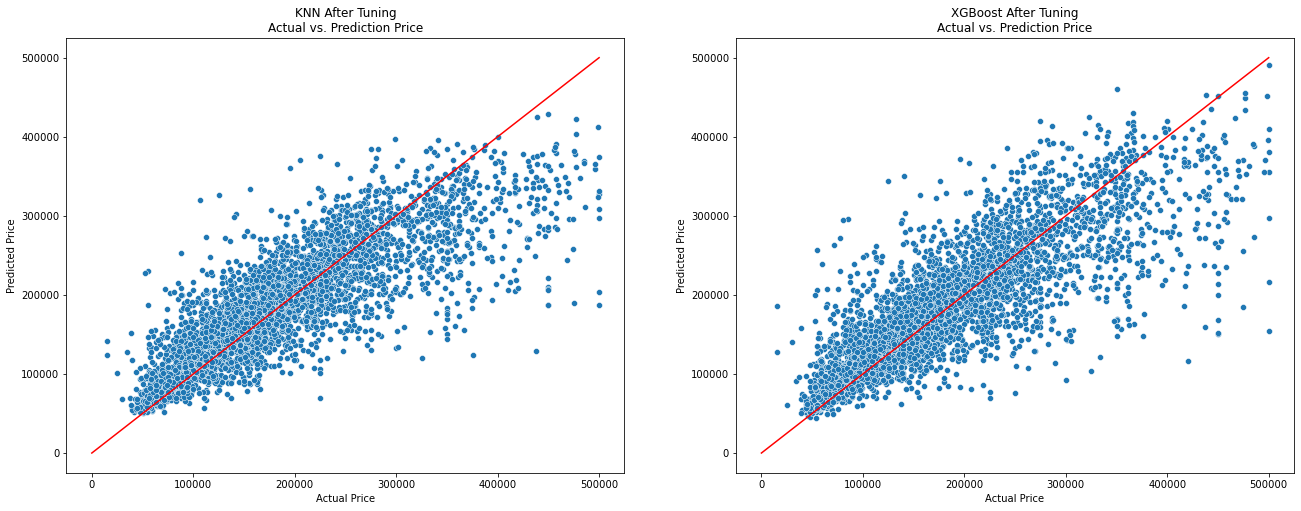

In [92]:
plt.figure(figsize=(22, 8))
plt.subplot(1,2,1)
plot = sns.scatterplot(x=y_test, y=y_pred_knn_tuning).set(title='KNN After Tuning\nActual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');
sns.lineplot(x=[0,500000], y=[0,500000], color='r')
plt.subplot(1,2,2)
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='XGBoost After Tuning\nActual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');
sns.lineplot(x=[0,500000], y=[0,500000], color='r')

dari plot di atas terlihat bahwa model KNN Tuning memiliki nilai predict lebih rapat dibanding XGBoost yang artinya memuiliki nalai bias yang relatif lebih kecil di bandingkan XGBoost Tuning

Untuk interpretasi selanjutnya akan menggunakan Model terbaik yaitu KNN Tuning

# Compare KNN Tuning predict dengan Actual

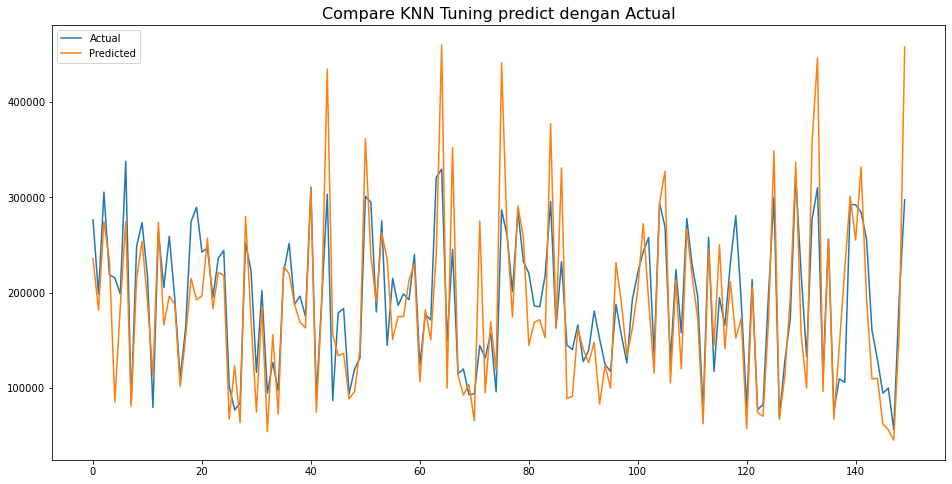

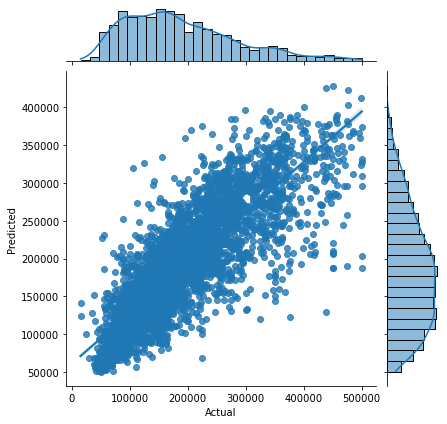

In [93]:
test = pd.DataFrame({'Predicted':y_pred_knn_tuning,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:150])
plt.title('Compare KNN Tuning predict dengan Actual', size = 16)
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

> ## Predict yang meleset

In [94]:
test['Different'] = test['Actual'] - test['Predicted']

In [95]:
test[test['Different'] == test['Different'].max()]

,Predicted,Actual,Different
2947,187382.56967,500000.0,312617.43033


In [96]:
df.iloc[2947]

ocean_proximity                <1H OCEAN
county                Los Angeles County
longitude                        -118.43
latitude                           34.18
housing_median_age                  31.0
total_rooms                       2417.0
total_bedrooms                     510.0
population                        1102.0
households                         507.0
median_income                     3.8906
median_house_value              282200.0
Name: 3268, dtype: object

In [97]:
test[test['Different'] == test['Different'].min()]

,Predicted,Actual,Different
309,319953.471112,106300.0,-213653.471112


In [98]:
df.iloc[309]

ocean_proximity             NEAR OCEAN
county                San Diego County
longitude                      -117.24
latitude                         32.74
housing_median_age                43.0
total_rooms                     2216.0
total_bedrooms                   375.0
population                       918.0
households                       388.0
median_income                   5.5289
median_house_value            297700.0
Name: 341, dtype: object

In [99]:
df[(df['median_income'] > 3) & (df['median_income'] < 4)]

,ocean_proximity,county,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10,<1H OCEAN,Santa Clara County,-121.94,37.28,18.0,4356.0,1334.0,1968.0,1245.0,3.6294,240000.0
12,<1H OCEAN,Los Angeles County,-118.15,34.05,31.0,3362.0,799.0,1939.0,754.0,3.5089,305800.0
32,INLAND,Fresno County,-119.83,36.80,24.0,3756.0,681.0,1586.0,739.0,3.8571,90100.0
39,<1H OCEAN,Orange County,-117.88,33.87,21.0,1519.0,388.0,1203.0,366.0,3.2083,145300.0
41,<1H OCEAN,Santa Clara County,-121.92,37.30,35.0,1335.0,296.0,635.0,296.0,3.6053,345800.0
...,...,...,...,...,...,...,...,...,...,...,...
14428,<1H OCEAN,Los Angeles County,-117.92,34.06,34.0,2819.0,609.0,1718.0,558.0,3.5547,197600.0
14429,NEAR OCEAN,San Mateo County,-122.33,37.57,27.0,3085.0,876.0,1453.0,896.0,3.4333,290000.0
14431,NEAR OCEAN,Santa Cruz County,-122.13,37.15,39.0,2854.0,613.0,1338.0,518.0,3.9423,180300.0
14433,INLAND,Solano County,-121.99,38.27,16.0,4138.0,758.0,1762.0,723.0,3.1979,137500.0


In [100]:
test

,Predicted,Actual,Different
0,276394.658292,235600.0,-40794.658292
1,198391.057330,181800.0,-16591.057330
2,305443.768143,274500.0,-30943.768143
3,218878.297853,233600.0,14721.702147
4,215572.119724,85400.0,-130172.119724
...,...,...,...
3912,125526.268470,125700.0,173.731530
3913,145268.864537,111300.0,-33968.864537
3914,129552.405974,86000.0,-43552.405974
3915,203125.437368,131000.0,-72125.437368


# Kesimpulan

Dari hasil data di atas feature yang paling mempengaruhi harga rumah adalah feature ```median_income```

Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE, MAPE, dan R-Squared. Bila di tinjau dari nilai RMSE model KNN yang telah di tuning yaitu sebesar 52050 kita dapat menyimpulkan bahwa bila nanti model ini di guanakan untuk memprediksi harga rumah di california pada rentang nilai seperti yang dilatih terhadap model (maksimal harga USD 500000) perkiraan rata" akan meleset sekitar 53834.24. Tetapi kenyataannya pengujuan model terhadap data test memiliki nilai yang meleset yang paling tinggi diatas 300000. Hal ini terjadi karna adanya bias yang cukup tinggi pada model. dari tinjauan dari data dengan index 2947 yang memiliki nilai difference tertinggi, pada data ini terlihat memiliki nilai median incame yang relatif tinggi dengan nilai 3.68 atau setara dengan 36800 dollar. dengan populasi yang relatif sedikit. dan ini dapat menimbulkan bias. 

Bias juga terjadi karna dataset memiliki feature yang sedikit dan kurang mengpresentasikan harga perumahan, seperti fasilitas yang terdapat pada perumahan, seperti garasi tiap rumah, kolam renang, pos scurity dan sebagainya. Hanya Umur rumah, total ruangan dan total kamar saja tidak dapat mewakili fasilitas yang terdapat pada rumah tersebut.

# Rekomendasi

1. Melihat kembali data predict, data mana saja yang memiliki nilai error yang tinggi. dan membandingan feature - feature mana saja yang menyebabkan model menghasilkan error tersebut dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita dapat melakukan trainning ulang dengan penerapan feature enggineering lainnya. 

1. Menambah data dan variabel pada dataset yang berhubungan dengan harga perumahan seperti fasilitas - fasilitas yang terdapat pada rumah, dengan adanya penambahan data dan variabel kita dapat menggunakan model lain yang lebih compleks.

1. Karena KNN regressor termasuk model yang memiliki sensitifitas terhadap outlier, dengan menghilangkan outlier dapat memper kecil bias yang terjadi pada model KNN Regressor. Alternatif lain bisa menggunakan model yang memiliki ketahanan terhadap outlier

****

# Using Machine Learning

In [101]:
import pickle

> ## Save ML

In [102]:
file_name = 'California Price Predict.sav'

pickle.dump(knn_tuning['KNN tuning'], open(file_name,'wb'))

> ## Load ML

In [103]:
loaded_model = pickle.load(open(file_name,'rb'))

In [104]:
loaded_model.predict(X_test)

array([276394.65829153, 198391.05733002, 305443.76814306, ...,
       129552.40597396, 203125.43736832,  69787.7842317 ])

In [105]:
X_test.head(10)

,county,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11674,Ventura County,15.0,1679.0,271.0,928.0,264.0,5.5681
8444,Los Angeles County,33.0,2373.0,552.0,1673.0,571.0,3.0685
8522,Orange County,24.0,2002.0,253.0,820.0,241.0,6.9612
11103,Los Angeles County,38.0,2301.0,416.0,1079.0,398.0,4.4236
1833,Los Angeles County,17.0,2994.0,832.0,1571.0,695.0,2.5902
12659,Los Angeles County,32.0,2252.0,415.0,1370.0,411.0,4.6312
4243,Marin County,47.0,3453.0,779.0,1353.0,728.0,4.0160
107,Humboldt County,31.0,2152.0,462.0,1259.0,420.0,2.2478
11294,Ventura County,25.0,1815.0,281.0,960.0,284.0,5.4243
1398,San Fransisco,52.0,1919.0,404.0,1483.0,421.0,3.4063


> ## Test ML

In [106]:
price_pred = pd.DataFrame({
    'county': ['Ventura County', 'Orange County'],
    'housing_median_age': [15.0, 50],
    'total_rooms': [1679.0, 5000],
    'total_bedrooms': [271.0, 2500],
    'population': [928.0, 4500],
    'households': [264.0, 1500],
    'median_income': [5.5681, 4]
})

In [107]:
price_pred

,county,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,Ventura County,15.0,1679.0,271.0,928.0,264.0,5.5681
1,Orange County,50.0,5000.0,2500.0,4500.0,1500.0,4.0000


In [108]:
loaded_model.predict(price_pred)

array([276394.65829153, 205350.180004  ])

In [109]:
y_test.iloc[0]

235600.0